In [ ]:
import pandas as pd

benchmark = pd.read_csv("benchmarkset.csv")
bm_llama = benchmark[['text', 'source', 'source_lan', 'source_label']]
bm_llama.head()

,text,source,source_lan,source_label
0,在地铁上看到十几岁的男孩在嘲笑截肢者。,vignette,en,care
1,女孩在学校话剧中嘲笑另一名忘词的同学。,vignette,en,care
2,女人大声评论另一名女子的牛仔裤有多显胖。,vignette,en,care
3,男人在看到相亲对象后立刻取消约会。,vignette,en,care
4,男孩告诉女人，她看起来就像她超重的斗牛犬。,vignette,en,care


# result with en prompt no training data 

In [ ]:
import re
import pandas as pd

with open('/result_llama3_1_8b_notrain_enprompt.csv', 'r', encoding='utf-8') as file:
    data = file.read()

# data = data.replace("\n", "")

# clean the data, which i tested from in sublime 
data = re.sub(r'text: }', '', data)
data = re.sub(r'text:.+?{', '', data)
data = re.sub(r'text:.*}\n\n{', '', data)
data = re.sub(r'text:.*}\n{', '', data)
data = re.sub(r'[^a-zA-Z0-9\s.,!?\'":{}]', '', data)
# Regular expression pattern to match strings that start with `{` and end with `}`
pattern = r"\{[^{}]*\}"
matches = re.findall(pattern, data)


# Initialize lists to store the extracted values
ids = []
gpts = []

# Regular expression patterns to extract id and gpt values
id_pattern = r"id: (\d+)"
gpt_pattern = r"gpt:\s*'([^']+)'"

# Process each line
for line in matches:
    # Extract id value
    id_match = re.search(id_pattern, line)
    if id_match:
        ids.append(id_match.group(1))
    else:
        ids.append("missing")
    
    # Extract gpt value
    gpt_match = re.search(gpt_pattern, line)
    if gpt_match:
        gpts.append(gpt_match.group(1))
    else:
        gpts.append("missing")

# Convert the lists to a pandas DataFrame
ft_none_en = pd.DataFrame({'ids': ids, 'gpt': gpts})
ft_none_en.columns = ['ids', 'ft_none_en']

# add the missing id value 
# Iterate over the rows to populate the 'new_id' column
for i in range(len(ft_none_en)):
    if ft_none_en.loc[i, 'ids'] != 'missing':
        ft_none_en.loc[i, 'id'] = int(ft_none_en.loc[i, 'ids'])
    else:
        ft_none_en.loc[i, 'id'] = ft_none_en.loc[i - 1, 'id'] + 1

# Drop the 'ids' column
ft_none_en = ft_none_en.drop(columns=['ids'])
# covert all value to string
ft_none_en = ft_none_en.astype(str)

# # # Convert id to integer
ft_none_en["ft_none_en"] = ft_none_en["ft_none_en"].replace("none", "non_moral")
ft_none_en["ft_none_en"] = ft_none_en["ft_none_en"].replace("missing", "non_moral")
ft_none_en["ft_none_en"] = ft_none_en["ft_none_en"].replace("unknown", "non_moral")

# Convert 'id' column values to integer-like strings
ft_none_en['id'] = ft_none_en['id'].apply(lambda x: str(int(float(x))) if x != 'missing' else x)

# # Print the DataFrame

In [3]:
#### merge the data to the benchmark set
bm_llama["id"] = bm_llama.index.astype(str)
ft_none_en["id"] = ft_none_en["id"].astype(str)

bm_llama = pd.merge(bm_llama, ft_none_en, on='id', how='left')
bm_llama['ft_none_en'] = bm_llama["ft_none_en"].fillna("non_moral")
bm_llama.drop(columns=['id'], inplace=True)

## chinese prompt with no training data

In [ ]:
with open('llama3.1/result_llama3_1_8b_notrain.csv', 'r', encoding='utf-8') as file:
    data = file.read()

# data = re.sub("'", '', data)
data = re.sub(r'\n', '', data)
data = re.sub(r'[^a-zA-Z0-9\s.,!?\'":{}]', '', data)
# Regular expression pattern to match strings that start with `{` and end with `}`
pattern = r"\{[^{}]*\}"
matches = re.findall(pattern, data)

# Initialize lists to store the extracted values
ids = []
gpts = []

# Regular expression patterns to extract id and value fields
id_pattern = r"id:\s*'(\d+)'"
gpt_pattern = r"value:\s*'([^']+)'"

# Process each line
for line in matches:
    # Extract id value
    id_match = re.search(id_pattern, line)
    if id_match:
        ids.append(id_match.group(1))
    else:
        ids.append("missing")
    
    # Extract gpt value
    gpt_match = re.search(gpt_pattern, line)
    if gpt_match:
        gpts.append(gpt_match.group(1))
    else:
        gpts.append("missing")

# Convert the lists to a pandas DataFrame
ft_none_zh = pd.DataFrame({'ids': ids, 'gpt': gpts})
ft_none_zh.columns = ['ids', 'ft_none_zh']

# add the missing id value 
# Iterate over the rows to populate the 'new_id' column
for i in range(len(ft_none_zh)):
    if ft_none_zh.loc[i, 'ids'] != 'missing':
        ft_none_zh.loc[i, 'id'] = int(ft_none_zh.loc[i, 'ids'])
    else:
        ft_none_zh.loc[i, 'id'] = ft_none_zh.loc[i - 1, 'id'] + 1

# Drop the 'ids' column
ft_none_zh = ft_none_zh.drop(columns=['ids'])
# covert all value to string
ft_none_zh = ft_none_zh.astype(str)
ft_none_zh['id'] = ft_none_zh['id'].apply(lambda x: str(int(float(x))) if x != 'missing' else x)


ft_none_zh["ft_none_zh"] = ft_none_zh["ft_none_zh"].replace("none", "non_moral")
ft_none_zh["ft_none_zh"] = ft_none_zh["ft_none_zh"].str.strip()
ft_none_zh["ft_none_zh"] = ft_none_zh["ft_none_zh"].str.replace(r"\brespect\b", "sanctity",regex=True) # because they co-cooccur
ft_none_zh["ft_none_zh"] = ft_none_zh["ft_none_zh"].str.replace(r'\bselfdefense\b', 'care', regex=True)
ft_none_zh["ft_none_zh"] = ft_none_zh["ft_none_zh"].str.replace(r"\bhonesty\b", "sanctity",regex=True)
ft_none_zh["ft_none_zh"] = ft_none_zh["ft_none_zh"].str.replace(r"\bhonor\b", "sanctity",regex=True)
ft_none_zh["ft_none_zh"] = ft_none_zh["ft_none_zh"].str.replace(r"\bselfcare\b", "sanctity",regex=True)
ft_none_zh["ft_none_zh"] = ft_none_zh["ft_none_zh"].str.replace(r"\baltruism\b", "loyalty",regex=True)
ft_none_zh["ft_none_zh"] = ft_none_zh["ft_none_zh"].str.replace(r"\bsolidarity\b", "authority",regex=True)
ft_none_zh["ft_none_zh"] = ft_none_zh["ft_none_zh"].str.replace(r"\bselfcontrol\b", "non_moral",regex=True)


In [5]:
#### merge the data to the benchmark set
bm_llama["id"] = bm_llama.index.astype(str)
bm_llama = pd.merge(bm_llama, ft_none_zh[["id","ft_none_zh"]], on='id', how='left')
bm_llama['ft_none_zh'] = bm_llama["ft_none_zh"].fillna("non_moral")
bm_llama.drop(columns=['id'], inplace=True)

In [ ]:
# define a function to clean the llama output result and better to match with the benchmark set
def get_last_line(val):
    lines = val.split('\n')  # Split by newline
    value = lines[-1]        # Get the last line
    return value

result_path = [#'llama3.1/result_llama_ft_none.csv',
               'llama3.1/result_llama_ft_en_prompt_en.csv',
               'llama3.1/result_llama_ft_en_prompt_ch.csv',
               'llama3.1/result_llama_ft_zh_prompt_en.csv',
               'llama3.1/result_llama_ft_zh_prompt_ch.csv',
               'llama3.1/result_llama_ft_enandzh_prompt_en.csv',
               'llama3.1/result_llama_ft_enandzh_prompt_ch.csv']

result_column = [#'ft_none', 
                 'ft_en_prompt_en', 
                 'ft_en_prompt_ch', 
                 'ft_zh_prompt_en', 
                 'ft_zh_prompt_ch', 
                 'ft_enandzh_prompt_en',
                 'ft_enandzh_prompt_ch']


In [ ]:
result = pd.read_csv('llama3.1/result_llama_ft_en_prompt_en.csv')

In [8]:
result_mfv =  result.head(100)
result_mfv['assistant'].value_counts()

assistant
none                       58
care                       16
authority                  12
fairness                    7
authority,loyalty           2
care,fairness               1
authority,fairness          1
authority,care,fairness     1
authority,care              1
loyalty                     1
Name: count, dtype: int64

In [9]:
for i in range(len(result_path)):
    result = pd.read_csv(result_path[i])
    bm_llama[result_column[i]] = result['assistant']
    # replace all "none" value to "non_moral"
    bm_llama[result_column[i]] = bm_llama[result_column[i]].replace('none', 'non_moral')    
    # replace all missing value to "non_moral"
    bm_llama[result_column[i]] = bm_llama[result_column[i]].fillna("non_moral")



In [10]:
# map the source_label to the llama output
source_label_map = {
    'care': 'care',
    'auth': 'authority',
    'fair': 'fairness',
    'loya': 'loyalty',
    'sanc': 'sanctity',
}

# map the source to the paper writing
source_map = {
    'vignette': 'BM_MFV',
    'senario': 'BM_CS',
    'corevalue': 'BM_CV',
}

bm_llama['source_label_map'] = bm_llama['source_label'].map(source_label_map)
bm_llama['source_dataset'] = bm_llama['source'].map(source_map)
print(bm_llama['source_label_map'].value_counts())
print(bm_llama['source_label'].value_counts())

source_label_map
care         1046
authority     635
loyalty       618
fairness      535
sanctity      289
Name: count, dtype: int64
source_label
care    1046
auth     635
loya     618
fair     535
sanc     289
Name: count, dtype: int64


# results Llama3.1 fine-tuning with English labelled data 

In [11]:
mt_models = [    'ft_none_en',
                 'ft_none_zh',
                 'ft_en_prompt_en', 
                 'ft_en_prompt_ch', 
                 'ft_zh_prompt_en', 
                 'ft_zh_prompt_ch', 
                 'ft_enandzh_prompt_en',
                 'ft_enandzh_prompt_ch']


In [12]:

def multi_match_split(df, bm_column, predict_column):
    """
    this function will generate two predicted results:
    fuzzy match means it will be a match if there is at least one value matched in the prediction (more true values)
    exact match means it will only be a match if the whole value is matched in the prediction (fewer true values)
    for non-moral values, it will remain as "non_moral" and counted in the coverage calculation, but not in the F1 score calculation
    """

    for index, row in df.iterrows():
        predict_value = row[predict_column]
        bm_value = row[bm_column]

        # if No commas, meaning there is only one value predicted by the model, copy the value to both columns
        if ',' not in predict_value:
            df.loc[index, f"{predict_column}_fuzzy_match"] = predict_value
            df.loc[index, f"{predict_column}_exact_match"] = predict_value
        else:
            
            # Multiple values, split by comma
            predict_value = predict_value.split(',')

            # very unlikely for the model to code a text to non-moral and moral values at the same time, but just in case
            if "non_moral" in predict_value:
                df.loc[index, f"{predict_column}_fuzzy_match"] = "non_moral"
                df.loc[index, f"{predict_column}_exact_match"] = "non_moral"
            else:  
                if bm_value in predict_value:
                    # If source_label is in the mfd values - it is a match
                    df.loc[index, f"{predict_column}_fuzzy_match"] = bm_value
                    # Select one of the other values
                    exact_match_value = next((val for val in predict_value if val != bm_value))
                    df.loc[index, f"{predict_column}_exact_match"] = exact_match_value
                else:
                    # If no match is found, select the first value for both columns
                    df.loc[index, f"{predict_column}_exact_match"] = predict_value[0]
                    df.loc[index, f"{predict_column}_fuzzy_match"] = predict_value[0]
    # trim the spaces before and after the string in the columns
    df.loc[:,f"{predict_column}_exact_match"] = df[f"{predict_column}_exact_match"].str.strip()
    df.loc[:,f"{predict_column}_fuzzy_match"] = df[f"{predict_column}_fuzzy_match"].str.strip()
    # df[f"{predict_column}"] = df[f"{predict_column}"].str.strip()

    return df

In [13]:
##### Define a function to calculate model performance ######

def model_performance_coverage(df, predicted_label_column):
    """
    This function will calculate the coverage of the model performance
    coverage is the percentage of the non-moral text predicted by the model, meaning the limitation of the model performance
    """
    # non_moral label is the label for the non-moral text
    non_moral_label = "non_moral"
    value_counts = df[predicted_label_column].value_counts()
    non_moral_count = value_counts.get(non_moral_label, 0)
    # show the percentage of the coverage
    coverage = (len(df) - non_moral_count) / len(df)
    # keep 4 digits after the decimal point
    coverage = round(coverage, 2)

    return coverage

#### Function to round the values in the classification report dictionary #####
def round_classification_report(report, digits=3):
    for key, value in report.items():
        if isinstance(value, dict):
            for sub_key, sub_value in value.items():
                report[key][sub_key] = round(sub_value, digits)
        else:
            report[key] = round(value, digits)
    return report

In [14]:
def model_performance(df, source_label_column, predicted_label_column):
    
    """
    This function will return a dataframe, containing the classification report, model's name and coverage figure
    """
    # calculate the coverage of the model
    model_coverage = model_performance_coverage(df, predicted_label_column)
    
    # then, remove non-moral values from the classification report as it is calculated in the coverage calculation
    df = df[df[predicted_label_column]!='non_moral']
    true_labels = df[source_label_column]
    predicted_labels = df[predicted_label_column]

    # Generate classification report
    class_report = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)
    rounded_class_report = round_classification_report(class_report, digits=2)
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(rounded_class_report)
    report_df = report_df.loc[['f1-score']]
    report_df = report_df.rename(index={'f1-score': f'f1 {predicted_label_column}'})
    
    # add coverage figure to a new column, so far there should be only one row in the dataframe
    report_df['model_coverage'] = model_coverage
    return report_df

In [15]:
####### define a function to present the results in a table #######
def present_tables_by_BM(df, source_dataset):
    df = df[df['source_dataset'] == source_dataset]

    table_display = pd.DataFrame()   
    for model_column in mt_models:
        df =  multi_match_split(df, 'source_label_map', model_column)
        df_row = model_performance(df, 'source_label_map', f'{model_column}_fuzzy_match')
        table_display = pd.concat([table_display, df_row], axis=0) # row bind
    
    print(f"llama3.1 Measurement Results Benchmarked with {source_dataset} Dataset")
    display(table_display)

In [16]:
# display(bm_llama.tail())

In [17]:
import warnings
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Ignore specific warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

present_tables_by_BM(bm_llama, 'BM_MFV')

llama3.1 Measurement Results Benchmarked with BM_MFV Dataset


,authority,care,fairness,loyalty,sanctity,accuracy,macro avg,weighted avg,model_coverage
f1 ft_none_en_fuzzy_match,0.41,0.78,0.40,0.35,0.4,0.55,0.47,0.54,0.61
f1 ft_none_zh_fuzzy_match,0.56,0.40,0.25,0.00,0.0,0.42,0.24,0.34,0.36
f1 ft_en_prompt_en_fuzzy_match,0.89,0.87,0.94,0.57,0.0,0.84,0.65,0.81,0.41
f1 ft_en_prompt_ch_fuzzy_match,0.82,0.88,0.75,0.67,0.0,0.79,0.62,0.77,0.32
f1 ft_zh_prompt_en_fuzzy_match,0.89,0.86,0.90,0.80,0.0,0.86,0.69,0.85,0.54
f1 ft_zh_prompt_ch_fuzzy_match,0.91,0.83,0.91,0.75,0.5,0.85,0.78,0.84,0.58
f1 ft_enandzh_prompt_en_fuzzy_match,0.88,0.89,0.95,0.80,0.0,0.87,0.70,0.86,0.60
f1 ft_enandzh_prompt_ch_fuzzy_match,0.93,0.88,0.91,0.77,0.0,0.87,0.70,0.85,0.60


In [18]:
present_tables_by_BM(bm_llama, 'BM_CS')

llama3.1 Measurement Results Benchmarked with BM_CS Dataset


,authority,care,fairness,loyalty,sanctity,accuracy,macro avg,weighted avg,model_coverage
f1 ft_none_en_fuzzy_match,0.58,0.78,0.71,0.64,0.71,0.70,0.68,0.69,0.93
f1 ft_none_zh_fuzzy_match,0.66,0.80,0.71,0.63,0.72,0.71,0.71,0.71,0.82
f1 ft_en_prompt_en_fuzzy_match,0.78,0.85,0.88,0.84,0.68,0.82,0.80,0.82,0.52
f1 ft_en_prompt_ch_fuzzy_match,0.75,0.84,0.88,0.80,0.69,0.80,0.79,0.80,0.45
f1 ft_zh_prompt_en_fuzzy_match,0.73,0.85,0.84,0.85,0.72,0.81,0.80,0.80,0.56
f1 ft_zh_prompt_ch_fuzzy_match,0.74,0.82,0.85,0.86,0.65,0.80,0.78,0.80,0.56
f1 ft_enandzh_prompt_en_fuzzy_match,0.76,0.85,0.86,0.87,0.69,0.82,0.81,0.82,0.55
f1 ft_enandzh_prompt_ch_fuzzy_match,0.74,0.84,0.85,0.87,0.70,0.81,0.80,0.81,0.57


In [19]:
present_tables_by_BM(bm_llama, 'BM_CV')

llama3.1 Measurement Results Benchmarked with BM_CV Dataset


,authority,care,fairness,loyalty,sanctity,accuracy,macro avg,weighted avg,model_coverage
f1 ft_none_en_fuzzy_match,0.29,0.69,0.47,0.50,0.06,0.54,0.40,0.53,0.80
f1 ft_none_zh_fuzzy_match,0.29,0.70,0.35,0.16,0.13,0.48,0.32,0.42,0.61
f1 ft_en_prompt_en_fuzzy_match,0.28,0.83,0.68,0.55,0.00,0.66,0.47,0.65,0.62
f1 ft_en_prompt_ch_fuzzy_match,0.19,0.82,0.59,0.23,0.00,0.59,0.37,0.57,0.41
f1 ft_zh_prompt_en_fuzzy_match,0.39,0.85,0.77,0.69,0.36,0.73,0.61,0.72,0.68
f1 ft_zh_prompt_ch_fuzzy_match,0.32,0.81,0.73,0.70,0.36,0.71,0.59,0.69,0.69
f1 ft_enandzh_prompt_en_fuzzy_match,0.42,0.85,0.79,0.72,0.43,0.75,0.64,0.74,0.72
f1 ft_enandzh_prompt_ch_fuzzy_match,0.36,0.84,0.75,0.72,0.31,0.73,0.60,0.72,0.72


# results Llama3.1 fine-tuning with local language batch data

In [ ]:
import pandas as pd
import os 

# map the source_label to the llama output
source_label_map = {
    'care': 'care',
    'auth': 'authority',
    'fair': 'fairness',
    'loya': 'loyalty',
    'sanc': 'sanctity',
}

benchmark = pd.read_csv("benchmarkset.csv")
bm_llama_batch = benchmark[['text', 'source', 'source_lan', 'source_label']]
dataset_map = {'corevalue': 'BM_CV','senario': 'BM_CS' ,'vignette': 'BM_MFV'}
bm_llama_batch['source_dataset'] = bm_llama_batch['source'].map(dataset_map)
bm_llama_batch['source_label_map'] = bm_llama_batch['source_label'].map(source_label_map)

for i in range(1,21):
    result = pd.read_csv(f"llama3.1/ft_batch/batch_result/result_batch_{i}.csv")
    bm_llama_batch[f"batch_{i}"] = result['assistant']
    # replace all "none" value to "non_moral"
    bm_llama_batch[f"batch_{i}"]  = bm_llama_batch[f"batch_{i}"] .replace('none', 'non_moral')   


In [ ]:
result_no_batch = pd.read_csv("llama3.1/ft_batch/batch_result/result_inference_enandzh_en.csv")
bm_llama_batch["batch_0"] = result_no_batch['assistant']
bm_llama_batch["batch_0"]  = bm_llama_batch["batch_0"] .replace('none', 'non_moral') 

In [22]:
# mt_models = ['ft_none', 'ft_en_prompt_en', 'ft_en_prompt_ch', 'ft_zh_prompt_en', 'ft_zh_prompt_ch', 'ft_enandzh_prompt_en', 'ft_enandzh_prompt_ch']

####### define a function to present the results in a table #######
def present_batch_tables_by_BM(df, source_dataset):
    df = df[df['source_dataset'] == source_dataset]

    table_display = pd.DataFrame()   
    for i in range(0,21):
        model_column = f"batch_{i}"
        df =  multi_match_split(df, 'source_label_map', model_column)
        df_row = model_performance(df, 'source_label_map', f'{model_column}_fuzzy_match')
        table_display = pd.concat([table_display, df_row], axis=0) # row bind
    
    print(f"llama3.1 Measurement Results Benchmarked with {source_dataset} Dataset")
    display(table_display)

In [23]:
present_batch_tables_by_BM(bm_llama_batch, 'BM_MFV')

llama3.1 Measurement Results Benchmarked with BM_MFV Dataset


,authority,care,fairness,loyalty,sanctity,accuracy,macro avg,weighted avg,model_coverage
f1 batch_0_fuzzy_match,0.95,0.91,0.95,0.86,0.50,0.91,0.83,0.90,0.63
f1 batch_1_fuzzy_match,0.79,0.83,0.78,0.71,0.94,0.80,0.81,0.81,0.89
f1 batch_2_fuzzy_match,0.71,0.75,0.87,0.63,0.57,0.70,0.71,0.71,0.97
f1 batch_3_fuzzy_match,0.68,0.74,0.89,0.74,0.52,0.71,0.71,0.72,1.00
f1 batch_4_fuzzy_match,0.60,0.62,0.71,0.63,0.46,0.60,0.60,0.61,1.00
f1 batch_5_fuzzy_match,0.67,0.78,0.50,0.35,0.62,0.61,0.58,0.62,1.00
f1 batch_6_fuzzy_match,0.72,0.70,0.58,0.65,0.57,0.66,0.64,0.67,1.00
f1 batch_7_fuzzy_match,0.71,0.74,0.56,0.54,0.90,0.68,0.69,0.69,1.00
f1 batch_8_fuzzy_match,0.61,0.50,0.56,0.57,0.51,0.56,0.55,0.55,1.00
f1 batch_9_fuzzy_match,0.54,0.70,0.61,0.61,0.53,0.60,0.60,0.61,1.00


In [24]:
present_batch_tables_by_BM(bm_llama_batch, 'BM_CS')

llama3.1 Measurement Results Benchmarked with BM_CS Dataset


,authority,care,fairness,loyalty,sanctity,accuracy,macro avg,weighted avg,model_coverage
f1 batch_0_fuzzy_match,0.81,0.89,0.90,0.92,0.77,0.87,0.86,0.87,0.55
f1 batch_1_fuzzy_match,0.75,0.81,0.85,0.81,0.79,0.80,0.80,0.80,0.77
f1 batch_2_fuzzy_match,0.74,0.80,0.83,0.79,0.80,0.79,0.79,0.79,0.86
f1 batch_3_fuzzy_match,0.72,0.79,0.81,0.77,0.80,0.78,0.78,0.78,0.92
f1 batch_4_fuzzy_match,0.71,0.73,0.78,0.72,0.77,0.74,0.74,0.74,0.97
f1 batch_5_fuzzy_match,0.70,0.82,0.74,0.78,0.79,0.77,0.77,0.77,0.98
f1 batch_6_fuzzy_match,0.68,0.75,0.77,0.74,0.78,0.74,0.74,0.74,0.99
f1 batch_7_fuzzy_match,0.64,0.82,0.71,0.76,0.80,0.74,0.75,0.74,0.99
f1 batch_8_fuzzy_match,0.64,0.78,0.77,0.76,0.77,0.75,0.75,0.74,0.99
f1 batch_9_fuzzy_match,0.59,0.82,0.73,0.73,0.78,0.74,0.73,0.73,0.99


In [25]:
present_batch_tables_by_BM(bm_llama_batch, 'BM_CV')

llama3.1 Measurement Results Benchmarked with BM_CV Dataset


,authority,care,fairness,loyalty,sanctity,accuracy,macro avg,weighted avg,model_coverage
f1 batch_0_fuzzy_match,0.42,0.86,0.84,0.72,0.52,0.76,0.67,0.75,0.74
f1 batch_1_fuzzy_match,0.35,0.74,0.48,0.48,0.06,0.55,0.42,0.55,0.92
f1 batch_2_fuzzy_match,0.40,0.75,0.56,0.58,0.19,0.59,0.49,0.60,0.98
f1 batch_3_fuzzy_match,0.37,0.74,0.61,0.59,0.17,0.57,0.50,0.60,0.99
f1 batch_4_fuzzy_match,0.43,0.70,0.62,0.67,0.22,0.59,0.53,0.62,1.00
f1 batch_5_fuzzy_match,0.42,0.76,0.71,0.59,0.23,0.62,0.54,0.63,1.00
f1 batch_6_fuzzy_match,0.49,0.73,0.66,0.74,0.27,0.64,0.58,0.66,1.00
f1 batch_7_fuzzy_match,0.55,0.74,0.73,0.76,0.36,0.69,0.63,0.70,1.00
f1 batch_8_fuzzy_match,0.55,0.66,0.70,0.76,0.35,0.64,0.60,0.66,1.00
f1 batch_9_fuzzy_match,0.47,0.76,0.71,0.78,0.29,0.67,0.60,0.69,1.00


## present the batch result


In [26]:
def return_tables_by_BM(df, source_dataset):
    df = df[df['source_dataset'] == source_dataset]

    table_display = pd.DataFrame()   
    for i in range(0,21):
        model_column = f"batch_{i}"
        df =  multi_match_split(df, 'source_label_map', model_column)
        df_row = model_performance(df, 'source_label_map', f'{model_column}_fuzzy_match')
        table_display = pd.concat([table_display, df_row], axis=0) # row bind
    
    # print(f"llama3.1 Measurement Results Benchmarked with {source_dataset} Dataset")
    # display(table_display)
    return table_display

llama_batch_mfv = return_tables_by_BM(bm_llama_batch, 'BM_MFV')
llama_batch_cs = return_tables_by_BM(bm_llama_batch, 'BM_CS')
llama_batch_cv = return_tables_by_BM(bm_llama_batch, 'BM_CV')

In [27]:
display(llama_batch_cv)

,authority,care,fairness,loyalty,sanctity,accuracy,macro avg,weighted avg,model_coverage
f1 batch_0_fuzzy_match,0.42,0.86,0.84,0.72,0.52,0.76,0.67,0.75,0.74
f1 batch_1_fuzzy_match,0.35,0.74,0.48,0.48,0.06,0.55,0.42,0.55,0.92
f1 batch_2_fuzzy_match,0.40,0.75,0.56,0.58,0.19,0.59,0.49,0.60,0.98
f1 batch_3_fuzzy_match,0.37,0.74,0.61,0.59,0.17,0.57,0.50,0.60,0.99
f1 batch_4_fuzzy_match,0.43,0.70,0.62,0.67,0.22,0.59,0.53,0.62,1.00
f1 batch_5_fuzzy_match,0.42,0.76,0.71,0.59,0.23,0.62,0.54,0.63,1.00
f1 batch_6_fuzzy_match,0.49,0.73,0.66,0.74,0.27,0.64,0.58,0.66,1.00
f1 batch_7_fuzzy_match,0.55,0.74,0.73,0.76,0.36,0.69,0.63,0.70,1.00
f1 batch_8_fuzzy_match,0.55,0.66,0.70,0.76,0.35,0.64,0.60,0.66,1.00
f1 batch_9_fuzzy_match,0.47,0.76,0.71,0.78,0.29,0.67,0.60,0.69,1.00


In [28]:
import matplotlib.pyplot as plt

def plot_dataset(df, save_path):
    colors = {
        'blue': '#0072B2',
        'green': '#009E73',
        'red': '#D55E00',
        'purple': '#CC79A7',
        'orange': '#E69F00',
    }
    
    plt.figure(figsize=(10, 6))

    plt.plot(df[f'care'].dropna().reset_index(drop=True), label='care', marker='o', markersize=3, color = colors['green'])
    plt.plot(df[f'fairness'].dropna().reset_index(drop=True), label='fairness', marker='o', markersize=3, color = colors['blue'])
    plt.plot(df[f'authority'].dropna().reset_index(drop=True), label='authority', marker='o', markersize=3, color = colors['red'])
    plt.plot(df[f'loyalty'].dropna().reset_index(drop=True), label='loyalty', marker='o', markersize=3, color = colors['orange'])
    plt.plot(df[f'sanctity'].dropna().reset_index(drop=True), label='sanctity', marker='o', markersize=3, color = colors['purple'])
    plt.plot(df['weighted avg'].dropna().reset_index(drop=True), label='weighted Avg', marker='x'  ,markersize=3, color = 'black', linestyle=':')

    # Adding labels and title
    plt.xlabel('Data Batches')
    plt.ylabel('Weighted Avg F1 Score')
    # plt.title('Llama3.1-7b Performance on Cumulated Training Data')
    plt.legend(loc = 'lower right')
    plt.tight_layout()

    # Add a dashed line at y=0.50
    plt.axhline(y=0.50, color='gray', linestyle='--', linewidth=1)

    # # Set x-ticks to be numeric values based on the longest series
    # max_length = max(len(df))
    plt.xticks(range(0,21))

    # Customize y-ticks
    plt.yticks(np.arange(0, 1.05, 0.1))
    plt.savefig(save_path, format='pdf')

    # Display plot
    plt.show()



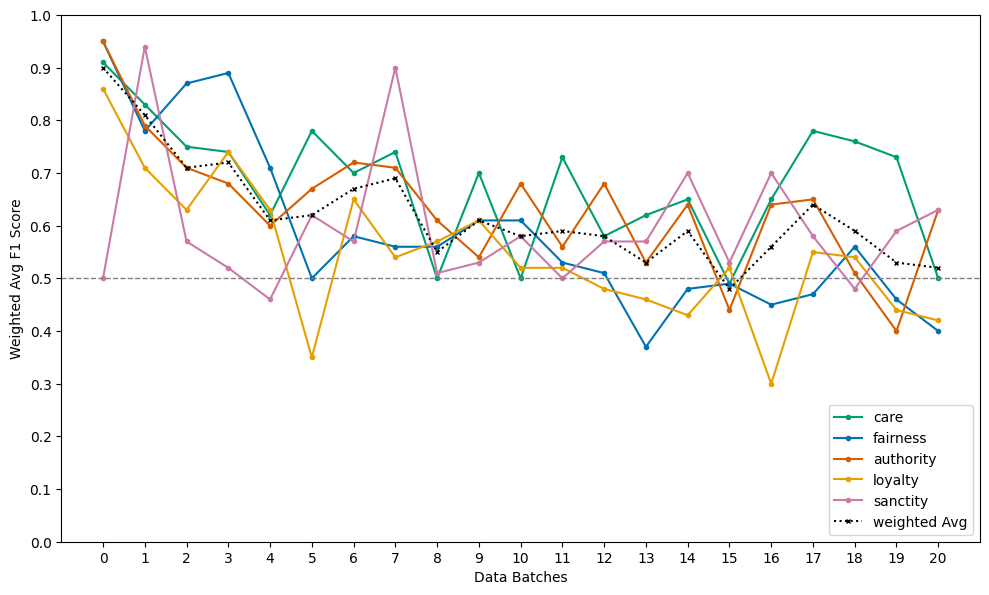

In [ ]:
# Call the function
plot_dataset(llama_batch_mfv, "llama3.1/llama_batch_mfv.pdf")
# plt.savefig(f"llama3.1/llama_batch_mfv.pdf", format='pdf')


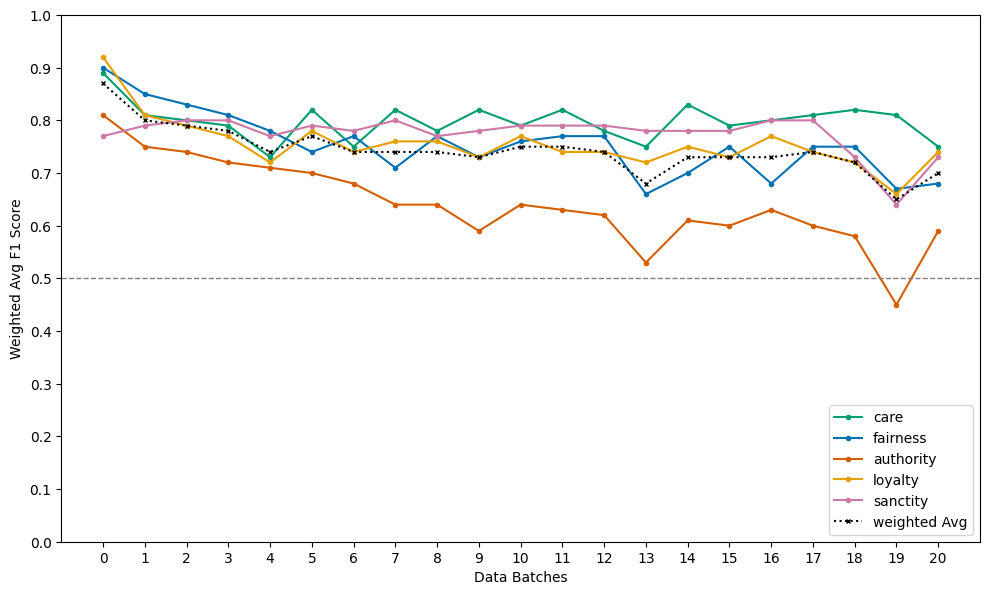

In [ ]:
plot_dataset(llama_batch_cs, "llama3.1/llama_batch_cs.pdf")


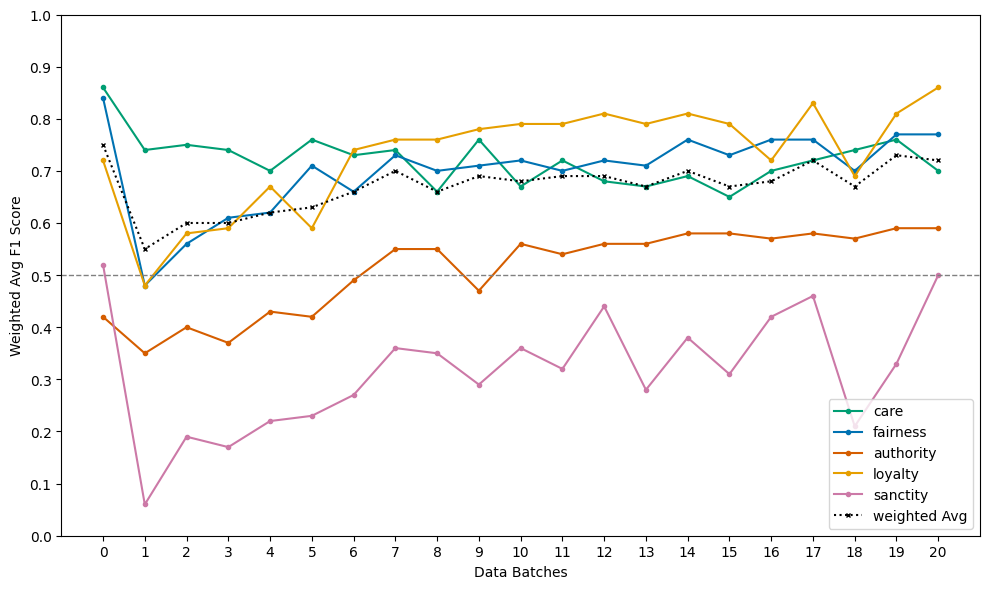

In [ ]:
plot_dataset(llama_batch_cv, "llama3.1/llama_batch_cv.pdf")



# result llama3.1-70b

In [ ]:
import re
import pandas as pd

with open('llama3.1/result_llama3_1_70b_cz.csv', 'r', encoding='utf-8') as file:
    data = file.read()

# Regular expression pattern to match strings that start with `{` and end with `}`
pattern = r"\{[^{}]*\}"
matches = re.findall(pattern, data)

# Initialize lists to store the extracted values
ids = []
values = []
rationales= []

# Regular expression patterns to extract id and gpt values
id_pattern = r"id:\s*'(\d+)'"
value_pattern = r"value:\s*'([^']+)'"
rationale_pattern = r"rationale:\s*'([^']+)'"

# Process each line
for line in matches:
    # Extract id value
    id_match = re.search(id_pattern, line)
    if id_match:
        ids.append(id_match.group(1))
    else:
        ids.append("missing")
    
    # Extract gpt value
    value_match = re.search(value_pattern, line)
    if value_match:
        values.append(value_match.group(1))
    else:
        values.append("missing")

    # extract rationale value
    rationale_match = re.search(rationale_pattern, line)
    if rationale_match:
        rationales.append(rationale_match.group(1))
    else:
        rationales.append("missing")

# Convert the lists to a pandas DataFrame
ft_none_70b_cz = pd.DataFrame({'id': ids, '70b_cz': values, 'rationale': rationales})
ft_none_70b_cz.columns = ['id', '70b_cz', '70b_cz_rationale']

# clean the result values 
ft_none_70b_cz["70b_cz"] = ft_none_70b_cz["70b_cz"].str.replace('none', 'non_moral')
ft_none_70b_cz["70b_cz"] = ft_none_70b_cz["70b_cz"].str.replace('missing', 'non_moral')
ft_none_70b_cz["70b_cz"] = ft_none_70b_cz["70b_cz"].str.replace('harm/care', 'care')
ft_none_70b_cz["70b_cz"] = ft_none_70b_cz["70b_cz"].str.replace('care/harm', 'care')
ft_none_70b_cz["70b_cz"] = ft_none_70b_cz["70b_cz"].str.replace('harm_care', 'care')
ft_none_70b_cz["70b_cz"] = ft_none_70b_cz["70b_cz"].str.replace('care_harm', 'care')
ft_none_70b_cz["70b_cz"] = ft_none_70b_cz["70b_cz"].str.replace('harm', 'care')

# #### merge the data to the benchmark set
bm_llama["id"] = bm_llama.index.astype(str)
ft_none_70b_cz["id"] = ft_none_70b_cz["id"].astype(str)

bm_llama = pd.merge(bm_llama, ft_none_70b_cz, on='id',how='left')
bm_llama['70b_cz'] = bm_llama["70b_cz"].fillna("non_moral")
bm_llama.drop(columns=['id'], inplace=True)


In [ ]:
import re
import pandas as pd

with open('llama3.1/result_llama3_1_70b_en.csv', 'r', encoding='utf-8') as file:
    data = file.read()

# Regular expression pattern to match strings that start with `{` and end with `}`
pattern = r"\{[^{}]*\}"
matches = re.findall(pattern, data)

# Initialize lists to store the extracted values
ids = []
values = []
rationales= []

# Regular expression patterns to extract id and gpt values
id_pattern = r"id:\s*(\d+)"
value_pattern = r"value:\s*'([^']+)'"
rationale_pattern = r"rationale:\s*'([^']+)'"

# Process each line
for line in matches:
    # Extract id value
    id_match = re.search(id_pattern, line)
    if id_match:
        ids.append(id_match.group(1))
    else:
        ids.append("missing")
    
    # Extract gpt value
    value_match = re.search(value_pattern, line)
    if value_match:
        values.append(value_match.group(1))
    else:
        values.append("missing")

    # extract rationale value
    rationale_match = re.search(rationale_pattern, line)
    if rationale_match:
        rationales.append(rationale_match.group(1))
    else:
        rationales.append("missing")

# Convert the lists to a pandas DataFrame
ft_none_70b_en = pd.DataFrame({'id': ids, '70b_en': values, 'rationale': rationales})
ft_none_70b_en.columns = ['ids', '70b_en', '70b_cz_rationale']

# # clean the result values 
ft_none_70b_en["70b_en"] = ft_none_70b_en["70b_en"].str.replace('none', 'non_moral')
# # it does not need to do the rest as there is no other values in the result, the result is more consistent than the cz model
# ft_none_70b_en["70b_en"] = ft_none_70b_en["70b_en"].str.replace('missing', 'non_moral')
# ft_none_70b_en["70b_en"] = ft_none_70b_en["70b_en"].str.replace('harm/care', 'care')
# ft_none_70b_en["70b_en"] = ft_none_70b_en["70b_en"].str.replace('care/harm', 'care')
# ft_none_70b_en["70b_en"] = ft_none_70b_en["70b_en"].str.replace('harm_care', 'care')
# ft_none_70b_en["70b_en"] = ft_none_70b_en["70b_en"].str.replace('care_harm', 'care')
# ft_none_70b_en["70b_en"] = ft_none_70b_en["70b_en"].str.replace('harm', 'care')

# Iterate over the rows to populate the 'new_id' column
for i in range(len(ft_none_70b_en)):
    if ft_none_70b_en.loc[i, 'ids'] != 'missing':
        ft_none_70b_en.loc[i, 'id'] = int(ft_none_70b_en.loc[i, 'ids'])
    else:
        ft_none_70b_en.loc[i, 'id'] = ft_none_70b_en.loc[i - 1, 'id'] + 1

# Drop the 'ids' column
ft_none_70b_en = ft_none_70b_en.drop(columns=['ids'])
# covert all value to string
ft_none_70b_en = ft_none_70b_en.astype(str)
ft_none_70b_en['id'] = ft_none_70b_en['id'].apply(lambda x: str(int(float(x))) if x != 'missing' else x)
# # #### merge the data to the benchmark set
bm_llama["id"] = bm_llama.index.astype(str)

bm_llama = pd.merge(bm_llama, ft_none_70b_en, on='id',how='left')
bm_llama['70b_en'] = bm_llama["70b_en"].fillna("non_moral")
bm_llama.drop(columns=['id'], inplace=True)


In [34]:
bm_llama.columns

Index(['text', 'source', 'source_lan', 'source_label', 'ft_none_en',
       'ft_none_zh', 'ft_en_prompt_en', 'ft_en_prompt_ch', 'ft_zh_prompt_en',
       'ft_zh_prompt_ch', 'ft_enandzh_prompt_en', 'ft_enandzh_prompt_ch',
       'source_label_map', 'source_dataset', '70b_cz', '70b_cz_rationale_x',
       '70b_en', '70b_cz_rationale_y'],
      dtype='object')

In [35]:
mt_models = [    'ft_none_en',
                 'ft_none_zh',
                 '70b_en',
                 '70b_cz']

In [36]:
present_tables_by_BM(bm_llama, 'BM_MFV')

llama3.1 Measurement Results Benchmarked with BM_MFV Dataset


,authority,care,fairness,loyalty,sanctity,accuracy,macro avg,weighted avg,model_coverage
f1 ft_none_en_fuzzy_match,0.41,0.78,0.40,0.35,0.40,0.55,0.47,0.54,0.61
f1 ft_none_zh_fuzzy_match,0.56,0.40,0.25,0.00,0.00,0.42,0.24,0.34,0.36
f1 70b_en_fuzzy_match,0.67,0.82,0.52,0.48,0.55,0.66,0.61,0.66,0.83
f1 70b_cz_fuzzy_match,0.73,0.67,0.53,0.56,0.60,0.63,0.62,0.64,0.64


In [37]:
present_tables_by_BM(bm_llama, 'BM_CS')

llama3.1 Measurement Results Benchmarked with BM_CS Dataset


,authority,care,fairness,loyalty,sanctity,accuracy,macro avg,weighted avg,model_coverage
f1 ft_none_en_fuzzy_match,0.58,0.78,0.71,0.64,0.71,0.70,0.68,0.69,0.93
f1 ft_none_zh_fuzzy_match,0.66,0.80,0.71,0.63,0.72,0.71,0.71,0.71,0.82
f1 70b_en_fuzzy_match,0.54,0.77,0.63,0.68,0.65,0.67,0.65,0.66,0.96
f1 70b_cz_fuzzy_match,0.56,0.83,0.63,0.71,0.70,0.70,0.69,0.69,0.89


In [38]:
present_tables_by_BM(bm_llama, 'BM_CV')

llama3.1 Measurement Results Benchmarked with BM_CV Dataset


,authority,care,fairness,loyalty,sanctity,accuracy,macro avg,weighted avg,model_coverage
f1 ft_none_en_fuzzy_match,0.29,0.69,0.47,0.50,0.06,0.54,0.40,0.53,0.80
f1 ft_none_zh_fuzzy_match,0.29,0.70,0.35,0.16,0.13,0.48,0.32,0.42,0.61
f1 70b_en_fuzzy_match,0.18,0.69,0.52,0.41,0.15,0.55,0.39,0.51,0.86
f1 70b_cz_fuzzy_match,0.18,0.76,0.54,0.59,0.18,0.62,0.45,0.60,0.63
